In [1]:
import pandas as pd , numpy as np

In [2]:
stroke_df = pd.read_csv('StrokeMortality65older2005_2019.csv')

In [3]:
stroke_df.head()

,Year,LocationDesc,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
0,2005,Adair,All stroke,387.3,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,331.8,456.1,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,29001
1,2005,Andrew,All stroke,420.2,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,351.9,503.2,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,29003
2,2005,Atchison,All stroke,469.8,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,376.2,559.1,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,29005
3,2005,Audrain,All stroke,340.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,294.6,426.9,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,29007
4,2005,Barry,All stroke,463.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,388.7,551.4,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,29009


In [4]:
stroke_df.Data_Value.isna().sum()

0

In [5]:
stroke_df.columns

Index(['Year', 'LocationDesc', 'Topic', 'Data_Value', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_limit_Low', 'Confidence_limit_High',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'LocationID'],
      dtype='object')

In [6]:
stroke_df = stroke_df[['Year', 'LocationDesc',  'Data_Value','Confidence_limit_Low', 'Confidence_limit_High','LocationID']]

In [7]:
stroke_df

,Year,LocationDesc,Data_Value,Confidence_limit_Low,Confidence_limit_High,LocationID
0,2005,Adair,387.3,331.8,456.1,29001
1,2005,Andrew,420.2,351.9,503.2,29003
2,2005,Atchison,469.8,376.2,559.1,29005
3,2005,Audrain,340.7,294.6,426.9,29007
4,2005,Barry,463.0,388.7,551.4,29009
...,...,...,...,...,...,...
1720,2019,Washington,239.9,194.5,300.7,29221
1721,2019,Wayne,277.0,229.5,326.7,29223
1722,2019,Webster,258.4,217.5,310.6,29225
1723,2019,Worth,228.0,183.6,277.4,29227


In [8]:
display(stroke_df['Data_Value'].quantile(0.2),
stroke_df['Data_Value'].quantile(0.4),
stroke_df['Data_Value'].quantile(0.6),
stroke_df['Data_Value'].quantile(0.90),
stroke_df['Data_Value'].quantile(1))

267.38

291.66

322.84

396.28000000000003

626.7

In [9]:
stroke_df.describe()

,Year,Data_Value,Confidence_limit_Low,Confidence_limit_High,LocationID
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,2012.000000,316.413797,267.744928,373.604638,29117.713043
std,4.321747,60.673408,53.843580,70.267729,75.507536
min,2005.000000,185.300000,152.800000,228.900000,29001.000000
25%,2008.000000,273.300000,228.600000,323.600000,29057.000000
50%,2012.000000,306.100000,260.300000,361.900000,29115.000000
75%,2016.000000,350.500000,297.300000,416.700000,29173.000000
max,2019.000000,626.700000,547.300000,713.500000,29510.000000


In [10]:
labels = ['Low', 'Moderate', 'High', 'Very High']
stroke_df['quartile_labels'] = pd.qcut(stroke_df['Data_Value'], q=4, labels=labels)
pd.DataFrame(stroke_df['quartile_labels'].value_counts())

,quartile_labels
Low,432
Very High,431
High,431
Moderate,431


In [114]:
stroke_df.groupby('quartile_labels')['Data_Value'].describe()

,count,mean,std,min,25%,50%,75%,max
quartile_labels,,,,,,,,
Low,432.0,250.599537,18.564660,185.3,240.35,255.2,265.525,273.3
Medium,431.0,288.926218,9.457085,273.5,280.45,288.6,297.000,306.1
High,431.0,326.889327,12.334015,306.2,316.70,326.2,336.750,350.5
Highest,431.0,399.392807,45.296502,350.6,364.90,387.1,419.550,626.7


In [11]:
labels = ['Very Low','Low', 'Moderate', 'High', 'Very High']
stroke_df['quartile_labels'] = pd.qcut(stroke_df['Data_Value'], q=5, labels=labels)
pd.DataFrame(stroke_df['quartile_labels'].value_counts())

,quartile_labels
Very High,345
High,345
Moderate,345
Low,345
Very Low,345


In [12]:
stroke_df.groupby('quartile_labels')['Data_Value'].describe()
267.38
291.66
322.84
396.28000000000003
626.7

,count,mean,std,min,25%,50%,75%,max
quartile_labels,,,,,,,,
Very Low,345.0,245.654203,17.586046,185.3,235.8,250.3,259.9,267.3
Low,345.0,279.255362,7.008681,267.4,273.3,278.9,285.0,291.6
Moderate,345.0,306.560000,9.079780,291.7,299.0,306.1,314.8,322.8
High,345.0,340.353333,11.398319,322.9,329.8,339.3,350.5,362.3
Very High,345.0,410.246087,44.383382,362.5,377.4,396.4,428.3,626.7


In [24]:
pd.set_option('display.max_rows', 100)

In [31]:
stroke_df.tail(100)

,Year,LocationDesc,Data_Value,Confidence_limit_Low,Confidence_limit_High,LocationID,quintile_labels
1625,2019,Cape Girardeau,269.5,234.5,312.4,29031,Low
1626,2019,Carroll,256.6,204.7,317.0,29033,Low
1627,2019,Carter,286.6,228.3,347.9,29035,Medium
1628,2019,Cass,220.9,186.4,253.0,29037,Low
1629,2019,Cedar,279.3,229.9,333.6,29039,Medium
1630,2019,Chariton,248.9,202.3,307.5,29041,Low
1631,2019,Christian,254.6,218.2,299.5,29043,Low
1632,2019,Clark,277.6,219.5,339.3,29045,Medium
1633,2019,Clay,232.4,201.4,269.3,29047,Low
1634,2019,Clinton,306.1,247.7,375.2,29049,Medium


In [34]:
chr_data = pd.read_csv('CHR2019.csv' )

In [35]:
chr_data

,County,% Fair/Poor,% Smokers,% Obese,Food Environment Index,% Excessive Drinking,% Uninsured,% Unemployed,Income Ratio,Quality of Life,Social & Economic Factors
0,Adair,20,22,31,6.6,19,12,4.4,6.5,0.29,0.07
1,Andrew,15,18,33,8.5,18,10,3.1,4.0,-0.62,-0.36
2,Atchison,16,18,33,8.0,17,11,3.5,3.6,-0.52,-0.35
3,Audrain,18,21,35,7.5,18,12,3.5,3.7,0.10,0.03
4,Barry,22,23,33,7.7,16,16,3.4,4.0,0.27,-0.03
...,...,...,...,...,...,...,...,...,...,...,...
110,Wayne,23,24,36,6.4,15,15,5.1,4.5,0.58,0.34
111,Webster,21,23,33,7.8,17,14,3.9,4.1,-0.09,0.00
112,Worth,18,20,30,8.2,16,13,2.6,3.7,0.21,-0.29
113,Wright,24,26,29,7.0,15,16,5.0,4.2,0.36,0.24


In [36]:
stroke2019 = stroke_df[stroke_df['Year'] == 2019]

In [37]:
stroke2019

,Year,LocationDesc,Data_Value,Confidence_limit_Low,Confidence_limit_High,LocationID,quintile_labels
1610,2019,Adair,267.1,218.6,326.3,29001,Low
1611,2019,Andrew,231.8,189.4,275.8,29003,Low
1612,2019,Atchison,251.4,196.5,315.3,29005,Low
1613,2019,Audrain,265.1,222.0,312.1,29007,Low
1614,2019,Barry,251.6,214.8,297.9,29009,Low
...,...,...,...,...,...,...,...
1720,2019,Washington,239.9,194.5,300.7,29221,Low
1721,2019,Wayne,277.0,229.5,326.7,29223,Medium
1722,2019,Webster,258.4,217.5,310.6,29225,Low
1723,2019,Worth,228.0,183.6,277.4,29227,Low


In [47]:
mdf = pd.merge(stroke2019 ,chr_data , left_on = 'LocationDesc' , right_on = 'County' , how = 'inner' )

In [48]:
mdf

,Year,LocationDesc,Data_Value,Confidence_limit_Low,Confidence_limit_High,LocationID,quintile_labels,County,% Fair/Poor,% Smokers,% Obese,Food Environment Index,% Excessive Drinking,% Uninsured,% Unemployed,Income Ratio,Quality of Life,Social & Economic Factors
0,2019,Adair,267.1,218.6,326.3,29001,Low,Adair,20,22,31,6.6,19,12,4.4,6.5,0.29,0.07
1,2019,Andrew,231.8,189.4,275.8,29003,Low,Andrew,15,18,33,8.5,18,10,3.1,4.0,-0.62,-0.36
2,2019,Atchison,251.4,196.5,315.3,29005,Low,Atchison,16,18,33,8.0,17,11,3.5,3.6,-0.52,-0.35
3,2019,Audrain,265.1,222.0,312.1,29007,Low,Audrain,18,21,35,7.5,18,12,3.5,3.7,0.10,0.03
4,2019,Barry,251.6,214.8,297.9,29009,Low,Barry,22,23,33,7.7,16,16,3.4,4.0,0.27,-0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2019,Washington,239.9,194.5,300.7,29221,Low,Washington,21,25,30,7.1,17,14,5.5,4.3,0.56,0.30
111,2019,Wayne,277.0,229.5,326.7,29223,Medium,Wayne,23,24,36,6.4,15,15,5.1,4.5,0.58,0.34
112,2019,Webster,258.4,217.5,310.6,29225,Low,Webster,21,23,33,7.8,17,14,3.9,4.1,-0.09,0.00
113,2019,Worth,228.0,183.6,277.4,29227,Low,Worth,18,20,30,8.2,16,13,2.6,3.7,0.21,-0.29


In [49]:
mdf.isna().sum()

Year                         0
LocationDesc                 0
Data_Value                   0
Confidence_limit_Low         0
Confidence_limit_High        0
LocationID                   0
quintile_labels              0
County                       0
% Fair/Poor                  0
% Smokers                    0
% Obese                      0
Food Environment Index       0
% Excessive Drinking         0
% Uninsured                  0
% Unemployed                 0
Income Ratio                 0
Quality of Life              0
Social & Economic Factors    0
dtype: int64

In [50]:
rucc = pd.read_excel('Ruralurbancontinuumcodes2023.xlsx')

In [51]:
rucc = rucc[rucc['State'] == 'MO']

In [52]:
rucc

,FIPS,State,County_Name,Population_2020,RUCC_2023,Description
1485,29001,MO,Adair County,25314,7.0,"Nonmetro - Urban population of 5,000 to 20,000..."
1486,29003,MO,Andrew County,18135,3.0,Metro - Counties in metro areas of fewer than ...
1487,29005,MO,Atchison County,5305,9.0,"Nonmetro - Urban population of fewer than 5,00..."
1488,29007,MO,Audrain County,24962,6.0,"Nonmetro - Urban population of 5,000 to 20,000..."
1489,29009,MO,Barry County,34534,6.0,"Nonmetro - Urban population of 5,000 to 20,000..."
...,...,...,...,...,...,...
1595,29223,MO,Wayne County,10974,9.0,"Nonmetro - Urban population of fewer than 5,00..."
1596,29225,MO,Webster County,39085,2.0,"Metro - Counties in metro areas of 250,000 to ..."
1597,29227,MO,Worth County,1973,9.0,"Nonmetro - Urban population of fewer than 5,00..."
1598,29229,MO,Wright County,18188,8.0,"Nonmetro - Urban population of fewer than 5,00..."


In [53]:
mdf1 = pd.merge(mdf , rucc , left_on = 'LocationID' , right_on = 'FIPS' , how = 'inner' )

In [54]:
mdf1.isna().sum()

Year                         0
LocationDesc                 0
Data_Value                   0
Confidence_limit_Low         0
Confidence_limit_High        0
LocationID                   0
quintile_labels              0
County                       0
% Fair/Poor                  0
% Smokers                    0
% Obese                      0
Food Environment Index       0
% Excessive Drinking         0
% Uninsured                  0
% Unemployed                 0
Income Ratio                 0
Quality of Life              0
Social & Economic Factors    0
FIPS                         0
State                        0
County_Name                  0
Population_2020              0
RUCC_2023                    0
Description                  0
dtype: int64

In [55]:
mdf1.columns

Index(['Year', 'LocationDesc', 'Data_Value', 'Confidence_limit_Low',
       'Confidence_limit_High', 'LocationID', 'quintile_labels', 'County',
       '% Fair/Poor', '% Smokers', '% Obese', 'Food Environment Index',
       '% Excessive Drinking', '% Uninsured', '% Unemployed', 'Income Ratio',
       'Quality of Life', 'Social & Economic Factors', 'FIPS', 'State',
       'County_Name', 'Population_2020', 'RUCC_2023', 'Description'],
      dtype='object')

In [56]:
sac = pd.read_excel('pop_area_coverage.xlsx')

In [57]:
sac.columns

Index(['countyfips', 'total_coun', 'COUNTYNAME', 'CO_CLASS', 'Shape_Area',
       'total_county_population', 'county_area', 'block_population_15',
       'coverage_area_15', 'percent_population_cov_15', 'percent_area_cov_15',
       'block_population_30', 'coverage_area_30', 'percent_population_cov_30',
       'percent_area_cov_30', 'block_population_45', 'coverage_area_45',
       'percent_population_cov_45', 'percent_area_cov_45',
       'block_population_60', 'coverage_area_60', 'percent_population_cov_60',
       'percent_area_cov_60'],
      dtype='object')

In [58]:
sac

,countyfips,total_coun,COUNTYNAME,CO_CLASS,Shape_Area,total_county_population,county_area,block_population_15,coverage_area_15,percent_population_cov_15,...,percent_population_cov_30,percent_area_cov_30,block_population_45,coverage_area_45,percent_population_cov_45,percent_area_cov_45,block_population_60,coverage_area_60,percent_population_cov_60,percent_area_cov_60
0,1,25314,Adair,3,1.473828e+09,25314,569.05,21891,64.13,86.48,...,99.81,81.46,25314,569.00,100.00,99.99,25314,569.00,100.00,99.99
1,3,18135,Andrew,3,1.130412e+09,18135,436.45,6242,13.62,34.42,...,97.20,62.79,18135,432.23,100.00,99.03,18135,436.21,100.00,99.94
2,5,5305,Atchison,3,1.424461e+09,5305,549.99,0,0.00,0.00,...,0.00,0.00,1847,89.37,34.82,16.25,5032,360.98,94.85,65.63
3,7,24962,Audrain,3,1.803529e+09,24962,696.35,2,0.06,0.01,...,13.50,7.42,22747,379.60,91.13,54.51,24962,696.44,100.00,100.00
4,9,34534,Barry,3,2.046567e+09,34534,790.18,10925,75.54,31.64,...,70.07,39.13,32241,585.03,93.36,74.04,34434,731.92,99.71,92.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,223,10974,Wayne,3,2.005505e+09,10974,774.33,104,0.53,0.95,...,27.16,7.82,7326,231.79,66.76,29.93,10963,718.19,99.90,92.75
111,225,39085,Webster,3,1.536456e+09,39085,593.23,373,0.02,0.95,...,35.56,13.78,37497,383.83,95.94,64.70,39070,578.19,99.96,97.46
112,227,1973,Worth,3,6.909025e+08,1973,266.76,8,0.09,0.41,...,75.72,31.63,1973,266.68,100.00,99.97,1973,266.68,100.00,99.97
113,229,18188,Wright,3,1.768622e+09,18188,682.87,0,0.00,0.00,...,17.45,0.63,12879,200.66,70.81,29.38,18148,598.93,99.78,87.71


In [59]:
sac.countyfips.to_list()

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 186,
 187,
 189,
 195,
 197,
 199,
 201,
 203,
 205,
 207,
 209,
 211,
 213,
 215,
 217,
 219,
 221,
 223,
 225,
 227,
 229,
 510]

In [60]:
sac.COUNTYNAME.to_list()

['Adair',
 'Andrew',
 'Atchison',
 'Audrain',
 'Barry',
 'Barton',
 'Bates',
 'Benton',
 'Bollinger',
 'Boone',
 'Buchanan',
 'Butler',
 'Caldwell',
 'Callaway',
 'Camden',
 'Cape Girardeau',
 'Carroll',
 'Carter',
 'Cass',
 'Cedar',
 'Chariton',
 'Christian',
 'Clark',
 'Clay',
 'Clinton',
 'Cole',
 'Cooper',
 'Crawford',
 'Dade',
 'Dallas',
 'Daviess',
 'Dekalb',
 'Dent',
 'Douglas',
 'Dunklin',
 'Franklin',
 'Gasconade',
 'Gentry',
 'Greene',
 'Grundy',
 'Harrison',
 'Henry',
 'Hickory',
 'Holt',
 'Howard',
 'Howell',
 'Iron',
 'Jackson',
 'Jasper',
 'Jefferson',
 'Johnson',
 'Knox',
 'Laclede',
 'Lafayette',
 'Lawrence',
 'Lewis',
 'Lincoln',
 'Linn',
 'Livingston',
 'McDonald',
 'Macon',
 'Madison',
 'Maries',
 'Marion',
 'Mercer',
 'Miller',
 'Mississippi',
 'Moniteau',
 'Monroe',
 'Montgomery',
 'Morgan',
 'New Madrid',
 'Newton',
 'Nodaway',
 'Oregon',
 'Osage',
 'Ozark',
 'Pemiscot',
 'Perry',
 'Pettis',
 'Phelps',
 'Pike',
 'Platte',
 'Polk',
 'Pulaski',
 'Putnam',
 'Ralls',


In [26]:
mdf.LocationDesc.to_list()

['Adair',
 'Andrew',
 'Atchison',
 'Audrain',
 'Barry',
 'Barton',
 'Bates',
 'Benton',
 'Bollinger',
 'Boone',
 'Buchanan',
 'Butler',
 'Caldwell',
 'Callaway',
 'Camden',
 'Cape Girardeau',
 'Carroll',
 'Carter',
 'Cass',
 'Cedar',
 'Chariton',
 'Christian',
 'Clark',
 'Clay',
 'Clinton',
 'Cole',
 'Cooper',
 'Crawford',
 'Dade',
 'Dallas',
 'Daviess',
 'DeKalb',
 'Dent',
 'Douglas',
 'Dunklin',
 'Franklin',
 'Gasconade',
 'Gentry',
 'Greene',
 'Grundy',
 'Harrison',
 'Henry',
 'Hickory',
 'Holt',
 'Howard',
 'Howell',
 'Iron',
 'Jackson',
 'Jasper',
 'Jefferson',
 'Johnson',
 'Knox',
 'Laclede',
 'Lafayette',
 'Lawrence',
 'Lewis',
 'Lincoln',
 'Linn',
 'Livingston',
 'Macon',
 'Madison',
 'Maries',
 'Marion',
 'McDonald',
 'Mercer',
 'Miller',
 'Mississippi',
 'Moniteau',
 'Monroe',
 'Montgomery',
 'Morgan',
 'New Madrid',
 'Newton',
 'Nodaway',
 'Oregon',
 'Osage',
 'Ozark',
 'Pemiscot',
 'Perry',
 'Pettis',
 'Phelps',
 'Pike',
 'Platte',
 'Polk',
 'Pulaski',
 'Putnam',
 'Ralls',


In [61]:
five_digit_fips = ['29{:03d}'.format(code) for code in sac.countyfips]
five_digit_fips

['29001',
 '29003',
 '29005',
 '29007',
 '29009',
 '29011',
 '29013',
 '29015',
 '29017',
 '29019',
 '29021',
 '29023',
 '29025',
 '29027',
 '29029',
 '29031',
 '29033',
 '29035',
 '29037',
 '29039',
 '29041',
 '29043',
 '29045',
 '29047',
 '29049',
 '29051',
 '29053',
 '29055',
 '29057',
 '29059',
 '29061',
 '29063',
 '29065',
 '29067',
 '29069',
 '29071',
 '29073',
 '29075',
 '29077',
 '29079',
 '29081',
 '29083',
 '29085',
 '29087',
 '29089',
 '29091',
 '29093',
 '29095',
 '29097',
 '29099',
 '29101',
 '29103',
 '29105',
 '29107',
 '29109',
 '29111',
 '29113',
 '29115',
 '29117',
 '29119',
 '29121',
 '29123',
 '29125',
 '29127',
 '29129',
 '29131',
 '29133',
 '29135',
 '29137',
 '29139',
 '29141',
 '29143',
 '29145',
 '29147',
 '29149',
 '29151',
 '29153',
 '29155',
 '29157',
 '29159',
 '29161',
 '29163',
 '29165',
 '29167',
 '29169',
 '29171',
 '29173',
 '29175',
 '29177',
 '29179',
 '29181',
 '29183',
 '29185',
 '29186',
 '29187',
 '29189',
 '29195',
 '29197',
 '29199',
 '29201',


In [62]:
sac['LocationID'] = sac['countyfips'].apply(lambda x: '29{:03d}'.format(x))
sac['LocationID'] = sac['LocationID'].astype(int)
sac['LocationID']

0      29001
1      29003
2      29005
3      29007
4      29009
       ...  
110    29223
111    29225
112    29227
113    29229
114    29510
Name: LocationID, Length: 115, dtype: int64

In [63]:
mdf1 = pd.merge(mdf1 , sac , on = 'LocationID' , how = 'inner')

In [64]:
mdf1.columns

Index(['Year', 'LocationDesc', 'Data_Value', 'Confidence_limit_Low',
       'Confidence_limit_High', 'LocationID', 'quintile_labels', 'County',
       '% Fair/Poor', '% Smokers', '% Obese', 'Food Environment Index',
       '% Excessive Drinking', '% Uninsured', '% Unemployed', 'Income Ratio',
       'Quality of Life', 'Social & Economic Factors', 'FIPS', 'State',
       'County_Name', 'Population_2020', 'RUCC_2023', 'Description',
       'countyfips', 'total_coun', 'COUNTYNAME', 'CO_CLASS', 'Shape_Area',
       'total_county_population', 'county_area', 'block_population_15',
       'coverage_area_15', 'percent_population_cov_15', 'percent_area_cov_15',
       'block_population_30', 'coverage_area_30', 'percent_population_cov_30',
       'percent_area_cov_30', 'block_population_45', 'coverage_area_45',
       'percent_population_cov_45', 'percent_area_cov_45',
       'block_population_60', 'coverage_area_60', 'percent_population_cov_60',
       'percent_area_cov_60'],
      dtype='objec

In [65]:
mdf1 = mdf1[['Year', 'LocationDesc', 'Data_Value', 'Confidence_limit_Low',
       'Confidence_limit_High', 'LocationID','quintile_labels', '% Fair/Poor',
       '% Smokers', '% Obese', 'Food Environment Index',
       '% Excessive Drinking', '% Uninsured', '% Unemployed', 'Income Ratio',
       'Quality of Life', 'Social & Economic Factors', 'RUCC_2023' ,
       'countyfips',  'percent_population_cov_15', 'percent_area_cov_15',
        'percent_population_cov_30',
       'percent_area_cov_30',
       'percent_population_cov_45', 'percent_area_cov_45',
        'percent_population_cov_60',
       'percent_area_cov_60']]

In [66]:
mdf1.to_csv('Stroke_chr_rucc_sac_2019.csv')

In [67]:
mdf1 = pd.read_csv('Stroke_chr_rucc_sac_2019.csv')
mdf1 = mdf1.iloc[:,1:]

In [8]:
mdf1

,Year,LocationDesc,Data_Value,Confidence_limit_Low,Confidence_limit_High,LocationID,% Fair/Poor,% Smokers,% Obese,Food Environment Index,...,RUCC_2023,countyfips,percent_population_cov_15,percent_area_cov_15,percent_population_cov_30,percent_area_cov_30,percent_population_cov_45,percent_area_cov_45,percent_population_cov_60,percent_area_cov_60
0,2019,Adair,267.1,218.6,326.3,29001,20,22,31,6.6,...,7.0,1,86.48,11.27,99.81,81.46,100.00,99.99,100.00,99.99
1,2019,Andrew,231.8,189.4,275.8,29003,15,18,33,8.5,...,3.0,3,34.42,3.12,97.20,62.79,100.00,99.03,100.00,99.94
2,2019,Atchison,251.4,196.5,315.3,29005,16,18,33,8.0,...,9.0,5,0.00,0.00,0.00,0.00,34.82,16.25,94.85,65.63
3,2019,Audrain,265.1,222.0,312.1,29007,18,21,35,7.5,...,6.0,7,0.01,0.01,13.50,7.42,91.13,54.51,100.00,100.00
4,2019,Barry,251.6,214.8,297.9,29009,22,23,33,7.7,...,6.0,9,31.64,9.56,70.07,39.13,93.36,74.04,99.71,92.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2019,Washington,239.9,194.5,300.7,29221,21,25,30,7.1,...,8.0,221,68.15,12.53,98.20,56.00,99.92,95.65,100.00,99.96
111,2019,Wayne,277.0,229.5,326.7,29223,23,24,36,6.4,...,9.0,223,0.95,0.07,27.16,7.82,66.76,29.93,99.90,92.75
112,2019,Webster,258.4,217.5,310.6,29225,21,23,33,7.8,...,2.0,225,0.95,0.00,35.56,13.78,95.94,64.70,99.96,97.46
113,2019,Worth,228.0,183.6,277.4,29227,18,20,30,8.2,...,9.0,227,0.41,0.03,75.72,31.63,100.00,99.97,100.00,99.97


In [91]:
df = mdf1[[ 'Data_Value',  '% Fair/Poor',
       '% Smokers', '% Obese', 'Food Environment Index',
       '% Excessive Drinking', '% Uninsured', '% Unemployed', 'Income Ratio',
       'Quality of Life', 'Social & Economic Factors', 'RUCC_2023','percent_population_cov_15', 'percent_area_cov_15',
        'percent_population_cov_30',
       'percent_area_cov_30',
       'percent_population_cov_45', 'percent_area_cov_45',
        'percent_population_cov_60',
       'percent_area_cov_60']]

In [100]:
df['S_Mortality_Rate'] = df['Data_Value']
del df['Data_Value']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


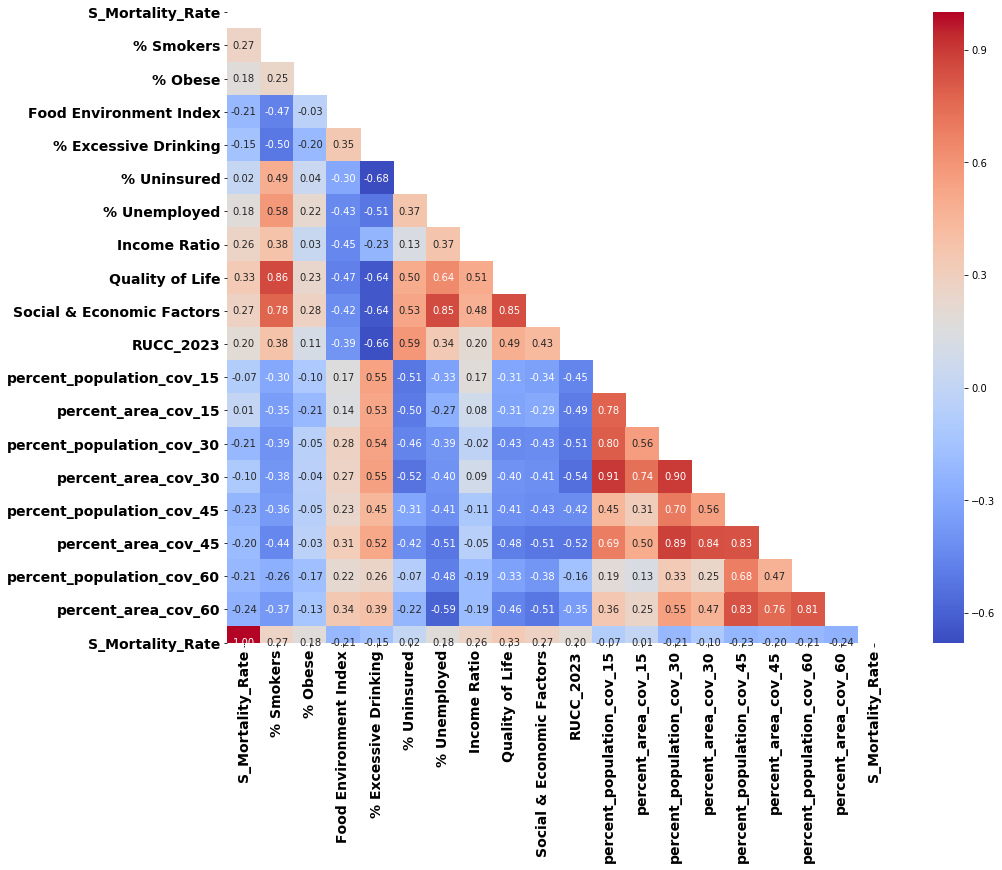

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


X = df.iloc[:, 1:]
y = df[['S_Mortality_Rate']]

scaler =  MinMaxScaler().fit(X = df.iloc[:, 1:] )
cols = X.columns
x_norm = pd.DataFrame(scaler.transform( X ), columns = cols , index = X.index)
df_norm = pd.concat([y, x_norm ] , axis = 1 )
#ss_std.head()
corr_matrix = df_norm.corr()
# Plot heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
label_font = {'fontsize': 14, 'fontweight': 'bold'}
# Plot heatmap with increased cell size
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, mask=mask, square=True)
plt.xticks(fontsize=label_font['fontsize'], fontweight=label_font['fontweight'])
plt.yticks(fontsize=label_font['fontsize'], fontweight=label_font['fontweight'])

plt.tight_layout()
plt.savefig('Normalized correlation plot.png',bbox_inches='tight')
plt.show()


In [105]:
df_norm.corr()[]

,S_Mortality_Rate,% Smokers,% Obese,Food Environment Index,% Excessive Drinking,% Uninsured,% Unemployed,Income Ratio,Quality of Life,Social & Economic Factors,RUCC_2023,percent_population_cov_15,percent_area_cov_15,percent_population_cov_30,percent_area_cov_30,percent_population_cov_45,percent_area_cov_45,percent_population_cov_60,percent_area_cov_60,S_Mortality_Rate
S_Mortality_Rate,1.000000,0.266701,0.178386,-0.213711,-0.149288,0.022321,0.178612,0.262440,0.330974,0.274874,0.198153,-0.069858,0.013509,-0.212093,-0.100452,-0.225586,-0.196415,-0.209660,-0.242400,1.000000
% Smokers,0.266701,1.000000,0.246516,-0.466099,-0.503600,0.488914,0.581763,0.378767,0.856251,0.775167,0.379837,-0.297364,-0.349141,-0.393517,-0.382909,-0.358311,-0.444573,-0.257930,-0.369690,0.266701
% Obese,0.178386,0.246516,1.000000,-0.034833,-0.201032,0.038688,0.224533,0.029572,0.233079,0.275340,0.109693,-0.103845,-0.206782,-0.045287,-0.036935,-0.054804,-0.032091,-0.171479,-0.131903,0.178386
Food Environment Index,-0.213711,-0.466099,-0.034833,1.000000,0.346390,-0.297560,-0.432600,-0.447161,-0.469928,-0.418536,-0.385725,0.166610,0.143394,0.280827,0.265152,0.233415,0.311902,0.217546,0.344173,-0.213711
% Excessive Drinking,-0.149288,-0.503600,-0.201032,0.346390,1.000000,-0.679727,-0.512427,-0.230802,-0.637761,-0.635072,-0.660665,0.545724,0.526225,0.537053,0.551191,0.448112,0.517604,0.257047,0.387277,-0.149288
% Uninsured,0.022321,0.488914,0.038688,-0.297560,-0.679727,1.000000,0.367490,0.131847,0.497327,0.534132,0.592865,-0.510477,-0.500586,-0.458931,-0.523400,-0.309006,-0.420527,-0.068811,-0.223274,0.022321
% Unemployed,0.178612,0.581763,0.224533,-0.432600,-0.512427,0.367490,1.000000,0.371856,0.644731,0.854424,0.339801,-0.328447,-0.265425,-0.386293,-0.400967,-0.411326,-0.511999,-0.480619,-0.591383,0.178612
Income Ratio,0.262440,0.378767,0.029572,-0.447161,-0.230802,0.131847,0.371856,1.000000,0.506601,0.479664,0.202983,0.173682,0.075606,-0.023238,0.086210,-0.108991,-0.051314,-0.188708,-0.191564,0.262440
Quality of Life,0.330974,0.856251,0.233079,-0.469928,-0.637761,0.497327,0.644731,0.506601,1.000000,0.846719,0.485242,-0.305837,-0.312990,-0.432007,-0.402608,-0.407153,-0.481328,-0.331604,-0.460235,0.330974
Social & Economic Factors,0.274874,0.775167,0.275340,-0.418536,-0.635072,0.534132,0.854424,0.479664,0.846719,1.000000,0.425494,-0.335393,-0.291060,-0.426516,-0.411583,-0.426158,-0.514413,-0.384045,-0.514650,0.274874


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data
X = df.iloc[:, 1:]
y = df[['S_Mortality_Rate']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler =  MinMaxScaler().fit(X = X_train )
cols = X_train.columns
x_train_norm = pd.DataFrame(scaler.transform( X_train ), columns = cols , index = X_train.index)

x_test_norm = pd.DataFrame(scaler.transform( X_test ), columns = cols , index = X_test.index)


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [ ]:
threshold = 0.5  # Example threshold value

# Filter columns based on the correlation threshold
columns_above_threshold = correlation_matrix.columns[correlation_matrix.abs().sum() > threshold]


In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression()
model.fit(x_train_norm, y_train)


y_pred = model.predict(x_test_norm)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 616.0735727866428
Mean Absolute Error (MAE): 20.15908774009534
R-squared (R2) Score: 0.14518571807209613


In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




model = Ridge()
model.fit(x_train_norm, y_train)


y_pred = model.predict(x_test_norm)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 547.7269679894212
Mean Absolute Error (MAE): 19.436257975780137
R-squared (R2) Score: 0.24001798564962518


In [44]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



reg = DecisionTreeRegressor(random_state=42)
reg.fit(x_train_norm, y_train)


y_pred = reg.predict(x_test_norm)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 2479.255217391305
Mean Absolute Error (MAE): 39.50869565217391
R-squared (R2) Score: -2.4400157091372425


In [45]:

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


reg = SVR(kernel='rbf')
reg.fit(x_train_norm, y_train)


y_pred = reg.predict(x_test_norm)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 722.478875363381
Mean Absolute Error (MAE): 20.69249867779412
R-squared (R2) Score: -0.002453746325049355


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


reg = DecisionTreeRegressor(criterion='mse', random_state=42)  # Gini index is not applicable for regression
reg.fit(x_train_norm, y_train)


y_pred = reg.predict(x_test_norm)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Squared Error:", mse)

print("R-squared (R2) Score:", r2)


Mean Squared Error: 2479.255217391305
Mean Squared Error: 2479.255217391305
R-squared (R2) Score: -2.4400157091372425


In [49]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



rf_regressor = RandomForestRegressor(n_estimators=5, random_state=42)


rf_regressor.fit(x_train_norm, y_train)


y_pred = rf_regressor.predict(x_test_norm)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Squared Error:", mse)

print("R-squared (R2) Score:", r2)


Mean Squared Error: 1241.7814956521738
Mean Squared Error: 1241.7814956521738
R-squared (R2) Score: -0.7229964153727546


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_centered)
print(pca.explained_variance_ratio_)
X_features = pca.transform(X_centered)
print('Features shape', X_features.shape)

In [36]:
#!pip install xgboost

     |████████████████████████████████| 798kB 1.5MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-wehhp8ma/xgboost/setup.py'"'"'; __file__='"'"'/tmp/pip-install-wehhp8ma/xgboost/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-f9cary37 --python-tag cp37
       cwd: /tmp/pip-install-wehhp8ma/xgboost/
  Complete output (848 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.7
  creating build/lib.linux-x86_64-3.7/xgboost
  copying xgboost/__init__.py -> build/lib.linux-x86_64-3.7/xgboost
  copying xgboost/_typing.py -> build/lib.linux-x86_64-3.7/xgboost
  copying xgboost/callback.py -> build/lib.linux-x86_64-3.7/xgboost
  copying xgboost/compa

Failed to build xgboost
  Running setup.py install for xgboost ... error
    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-wehhp8ma/xgboost/setup.py'"'"'; __file__='"'"'/tmp/pip-install-wehhp8ma/xgboost/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-2ij4gx6b/install-record.txt --single-version-externally-managed --compile
         cwd: /tmp/pip-install-wehhp8ma/xgboost/
    Complete output (848 lines):
    running install
    running build
    running build_py
    creating build
    creating build/lib.linux-x86_64-3.7
    creating build/lib.linux-x86_64-3.7/xgboost
    copying xgboost/__init__.py -> build/lib.linux-x86_64-3.7/xgboost
    copying xgboost/_typing.py -> build/lib.linux-x86_64-3.7/xgboost
    copying xg

ERROR: Command errored out with exit status 1: /opt/conda/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-wehhp8ma/xgboost/setup.py'"'"'; __file__='"'"'/tmp/pip-install-wehhp8ma/xgboost/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-2ij4gx6b/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [70]:
df1 = mdf1[[ 'quintile_labels',  '% Fair/Poor',
       '% Smokers', '% Obese', 'Food Environment Index',
       '% Excessive Drinking', '% Uninsured', '% Unemployed', 'Income Ratio',
       'Quality of Life', 'Social & Economic Factors', 'RUCC_2023','percent_population_cov_15', 'percent_area_cov_15',
        'percent_population_cov_30',
       'percent_area_cov_30',
       'percent_population_cov_45', 'percent_area_cov_45',
        'percent_population_cov_60',
       'percent_area_cov_60']]

In [76]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

X = df1.iloc[:, 1:]
y = df1[['quintile_labels']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


classifiers = {
    'Logistic Regression': LogisticRegression(),
    #'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # Need probability for ROC-AUC
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier()
}


for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')
    

    print(f'Classification Report for {name}:')
    print(classification_report(y_test, y_pred))
    

    print(f'Confusion Matrix for {name}:')
    print(confusion_matrix(y_test, y_pred))
    

    if hasattr(clf, 'predict_proba'):
        y_prob = clf.predict_proba(X_test_scaled)
        roc_auc = roc_auc_score(y_test, y_prob, average='macro')  # Macro-average
        print(f'ROC-AUC Score for {name}: {roc_auc:.2f}')
    

    if hasattr(clf, 'predict_proba'):

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(3):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve
        plt.figure()
        lw = 2
        plt.plot(fpr[2], tpr[2], color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc="lower right")
        plt.show()


Logistic Regression: Accuracy = 0.61
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.70      0.88      0.78        16
      Medium       0.00      0.00      0.00         6

   micro avg       0.61      0.61      0.61        23
   macro avg       0.23      0.29      0.26        23
weighted avg       0.49      0.61      0.54        23

Confusion Matrix for Logistic Regression:
[[ 0  0  1]
 [ 1 14  1]
 [ 0  6  0]]


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

ValueError: multiclass format is not supported

In [ ]:
X = df1.iloc[:, 1:]
y = df1[['quintile_labels']]

In [90]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

X = df1.iloc[:, 1:]
y = df1[['quintile_labels']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # Need probability for ROC-AUC
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    
}


for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')
    

    print(f'Classification Report for {name}:')
    print(classification_report(y_test, y_pred))
    

    print(f'Confusion Matrix for {name}:')
    print(confusion_matrix(y_test, y_pred))

    

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Logistic Regression: Accuracy = 0.61
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.70      0.88      0.78        16
      Medium       0.00      0.00      0.00         6

   micro avg       0.61      0.61      0.61        23
   macro avg       0.23      0.29      0.26        23
weighted avg       0.49      0.61      0.54        23

Confusion Matrix for Logistic Regression:
[[ 0  0  1]
 [ 1 14  1]
 [ 0  6  0]]
Decision Tree: Accuracy = 0.52
Classification Report for Decision Tree:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.77      0.62      0.69        16
      Medium       0.25      0.33      0.29         6

   micro avg       0.52      0.52      0.52        23
   macro avg       0.34      0.32      0.33        23
weighted avg       0.60      0.52      0.55        23

Con

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site

In [83]:

name = 'Logistic Regression'
clf = classifiers[name]
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'{name}: Accuracy = {accuracy:.2f}')

print(f'Classification Report for {name}:')
print(classification_report(y_test, y_pred))


print(f'Confusion Matrix for {name}:')
print(confusion_matrix(y_test, y_pred))



Logistic Regression: Accuracy = 0.61
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.70      0.88      0.78        16
      Medium       0.00      0.00      0.00         6

   micro avg       0.61      0.61      0.61        23
   macro avg       0.23      0.29      0.26        23
weighted avg       0.49      0.61      0.54        23

Confusion Matrix for Logistic Regression:
[[ 0  0  1]
 [ 1 14  1]
 [ 0  6  0]]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [87]:
df1.quintile_labels.value_counts()

Low        76
Medium     29
High        8
Highest     2
Name: quintile_labels, dtype: int64

In [92]:
from sklearn.decomposition import PCA
import pandas as pd


df_standardized = (df - df.mean()) / df.std()

pca = PCA()
pca.fit(df_standardized)


principal_components = pca.transform(df_standardized)


principal_df = pd.DataFrame(data=principal_components, 
                            columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
print(principal_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.738719 -3.929206 -0.271689  2.180263  0.271750 -0.428044 -0.773088   
1 -3.783590  1.583808  0.403797 -0.585317 -0.400778 -0.480946 -0.076658   
2  0.597390  4.295398  2.344126  0.278129  0.615894 -1.021181  0.204453   
3  0.308398  1.824500 -0.280265 -0.904481  0.745939  0.779875 -0.355880   
4  0.440886 -0.033346 -1.171441 -0.033727 -0.352378 -0.003792  1.253664   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.591706  2.598532 -0.081347  0.322755  1.181038 -0.079570 -0.075947   
1  0.274978  0.922908  0.423216  0.036443 -0.299039 -0.350918  0.164738   
2 -0.389869  0.180640 -1.184490  0.438280 -0.025954 -0.627151  0.180964   
3 -0.206512 -0.169008 -0.496241  0.107390  0.062215  0.618354  0.132241   
4 -1.043681 -0.300474  0.483990 -0.354032 -0.036006  0.201665  0.559692   

       PC15      PC16      PC17      PC18      PC19      PC20  
0 -0.172435  0.210908 -0.089762  0

In [94]:
pip install factor_analyzer

     |████████████████████████████████| 51kB 858kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-cp37-none-any.whl size=42568 sha256=8ac235e8f0549a32970ddb6f83e0b613addf1631469ce23c901964a83da17f84
  Stored in directory: /home/akdg3/.cache/pip/wheels/17/31/e2/e954d8bc7b421fde5fede31d1365fce5612bdacadf7e007815
Successfully built factor-analyzer
Note: you may need to restart the kernel to use updated packages.


In [99]:
from factor_analyzer import FactorAnalyzer


fa = FactorAnalyzer(n_factors=6, rotation='varimax')  # Choose appropriate number of factors
fa.fit(df)


factor_loadings = fa.loadings_


factor_loading_df = pd.DataFrame(data=factor_loadings, 
                                  index=df.columns,
                                  columns=[f'Factor {i+1}' for i in range(factor_loadings.shape[1])])
print(factor_loading_df)



                           Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
Data_Value                -0.017316  0.351540 -0.211025 -0.016335 -0.077143   
% Fair/Poor               -0.271347  0.852835 -0.135297  0.274576  0.053991   
% Smokers                 -0.268916  0.797783 -0.075429  0.119713  0.126860   
% Obese                   -0.020160  0.140884 -0.075120  0.036090  0.051796   
Food Environment Index     0.084466 -0.506738  0.150733 -0.218547 -0.133402   
% Excessive Drinking       0.365034 -0.351639  0.161554 -0.657195 -0.151403   
% Uninsured               -0.402695  0.306999  0.035868  0.600944  0.123011   
% Unemployed              -0.187479  0.455461 -0.330768  0.138891  0.764052   
Income Ratio               0.250962  0.611521 -0.102330  0.144539  0.137112   
Quality of Life           -0.212110  0.833146 -0.167570  0.241155  0.155019   
Social & Economic Factors -0.206428  0.690035 -0.220920  0.236019  0.474983   
RUCC_2023                 -0.354253  0.288448 -0.163